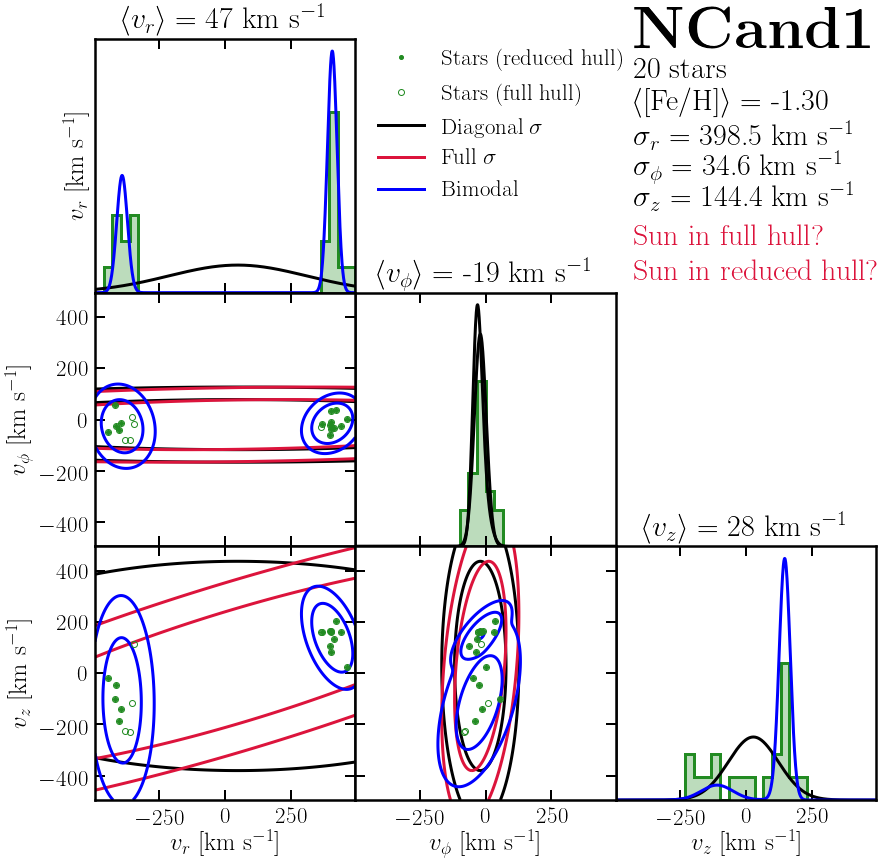

In [134]:
from __future__ import unicode_literals
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
from sklearn import mixture
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas
from PlotFuncs import *



vmin=-495.0
vmax=495.0
nbins=500
nbins_1D = 30
cmap=cm.Greens
col1='ForestGreen'
levels=[-9,-4]
tit_fontsize=30
z_th = 6.0
colp = 'ForestGreen'

df = pandas.read_csv('../GAIA_SDSS_substructures_next_30_cands.csv')
names = df.group_id.unique()
num_cands = size(names)

i_cand = 1
Cand = df.loc[df['group_id'] == names[i_cand]]


######
name = Cand.group_id.unique()[0]
nstars = size(Cand,0)
feh = Cand.feh
vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel
x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ

nstars = size(vx)
vx0 = mean(vx)
vy0 = mean(vy)
vz0 = mean(vz)
sigx = std(vx)
sigy = std(vy)
sigz = std(vz)

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(3, 3,figsize=(14,14))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.0,hspace=0.0)
ax_x = plt.subplot(gs[0,0])
ax_y = plt.subplot(gs[1,1])
ax_z = plt.subplot(gs[2,2])

ax_yx = plt.subplot(gs[1,0])
ax_zx = plt.subplot(gs[2,0])
ax_zy = plt.subplot(gs[2,1])

fig.delaxes(plt.subplot(gs[0,1]))
fig.delaxes(plt.subplot(gs[0,2]))
fig.delaxes(plt.subplot(gs[1,2]))

vv = linspace(vmin,vmax,nbins)
vfine = linspace(vmin,vmax,1000)
V1,V2 = meshgrid(vv,vv)

def fv_1D(v1):
    clf = mixture.GaussianMixture(n_components=1)
    clf.fit(v1.values.reshape(-1,1))
    fv = 10.**clf.score_samples(vfine.reshape(-1,1))
    fv /= trapz(fv,vfine)
    return fv

def fv_1D_bimodal(v1):
    clf = mixture.GaussianMixture(n_components=2)
    clf.fit(v1.values.reshape(-1,1))
    fv = 10.**clf.score_samples(vfine.reshape(-1,1))
    fv /= trapz(fv,vfine)
    return fv

def fv_2D_diag(v1,v2):
    model = mixture.GaussianMixture(n_components=1, covariance_type='diag')
    model.fit(array([v1,v2]).T)
    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    fv = fv-amax(fv)
    return fv

def fv_2D(v1,v2):
    model = mixture.GaussianMixture(n_components=1, covariance_type='full')
    model.fit(array([v1,v2]).T)
    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    fv = fv-amax(fv)
    return fv

def fv_2D_bimodal(v1,v2):
    model = mixture.GaussianMixture(n_components=2, covariance_type='full')
    model.fit(array([v1,v2]).T)
    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    fv = fv-amax(fv)
    return fv


# 1D plots
plt.sca(ax_x)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vx),'k-',linewidth=3)
plt.plot(vfine,fv_1D_bimodal(vx),'b-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_r \rangle= $ '+str(int(vx0))+r' km s$^{-1}$',fontsize=tit_fontsize)
plt.ylabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_y)
ax_y.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vy),'k-',linewidth=3)
plt.plot(vfine,fv_1D_bimodal(vy),'k-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_\phi \rangle = $ '+str(int(vy0))+r' km s$^{-1}$',fontsize=tit_fontsize)

plt.sca(ax_z)
ax_z.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,alpha=0.3,normed=1)
plt.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col1,linewidth=3,histtype='step',normed=1)
plt.plot(vfine,fv_1D(vz),'k-',linewidth=3)
plt.plot(vfine,fv_1D_bimodal(vz),'b-',linewidth=3)
plt.xlim([vmin,vmax])
plt.title(r'$\langle v_z \rangle= $ '+str(int(vz0))+r' km s$^{-1}$',fontsize=tit_fontsize)
plt.xlabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)

# reduced points
x_red,y_red,z_red,vx_red,vy_red,vz_red = RemovePhaseSpaceOutliers(x,y,z,vx,vy,vz,z_th=z_th)

# 2D plots
plt.sca(ax_yx)
#ax_yx.hist2d(vx,vy,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_yx.plot(vx_red,vy_red,'o',markersize=4,markerfacecolor=colp,markeredgecolor=colp,label='Stars (reduced hull)')
ax_yx.plot(vx,vy,'o',markersize=6,markerfacecolor='none',markeredgecolor=colp,label='Stars (full hull)')
ax_yx.contour(vv,vv,fv_2D_diag(vx,vy),levels=levels,colors='k',linewidths=3,linestyles='solid')
ax_yx.contour(vv,vv,fv_2D(vx,vy),levels=levels,colors='Crimson',linewidths=3,linestyles='solid')
ax_yx.contour(vv,vv,fv_2D_bimodal(vx,vy),levels=levels,colors='Blue',linewidths=3,linestyles='solid')
ax_yx.plot(10*vmin,-10*vmin,'k-',lw=3,label='Diagonal $\mathbf{\sigma}$')
ax_yx.plot(10*vmin,-10*vmin,'-',color='Crimson',lw=3,label='Full $\mathbf{\sigma}$')
ax_yx.set_xlim([vmin,vmax])
ax_yx.set_ylim([vmin,vmax])
plt.ylabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zx)
#ax_zx.hist2d(vx,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zx.plot(vx_red,vz_red,'o',markersize=4,markerfacecolor=colp,markeredgecolor=colp)
ax_zx.plot(vx,vz,'o',markersize=6,markerfacecolor='none',markeredgecolor=colp)
ax_zx.contour(vv,vv,fv_2D_diag(vx,vz),levels=levels,colors='k',linewidths=3,linestyles='solid')
ax_zx.contour(vv,vv,fv_2D(vx,vz),levels=levels,colors='Crimson',linewidths=3,linestyles='solid')
ax_zx.contour(vv,vv,fv_2D_bimodal(vx,vz),levels=levels,colors='Blue',linewidths=3,linestyles='solid')
plt.xlabel(r'$v_r$ [km s$^{-1}$]',fontsize=25)
plt.ylabel(r'$v_z$ [km s$^{-1}$]',fontsize=25)

plt.sca(ax_zy)
#ax_zy.hist2d(vy,vz,range=[[vmin, vmax], [vmin, vmax]],bins=nbins,cmap=cmap)
ax_zy.plot(vy_red,vz_red,'o',markersize=4,markerfacecolor=colp,markeredgecolor=colp)
ax_zy.plot(vy,vz,'o',markersize=6,markerfacecolor='none',markeredgecolor=colp)
ax_zy.contour(vv,vv,fv_2D_diag(vy,vz),levels=levels,colors='k',linewidths=3,linestyles='solid')
ax_zy.contour(vv,vv,fv_2D(vy,vz),levels=levels,colors='Crimson',linewidths=3,linestyles='solid')
ax_zy.contour(vv,vv,fv_2D_bimodal(vy,vz),levels=levels,colors='Blue',linewidths=3,linestyles='solid')
plt.xlabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=25)

ax_x.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_y.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_z.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_yx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)
ax_zy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=23)

ax_x.set_yticks([])
ax_y.set_yticks([])
ax_z.set_yticks([])
ax_x.set_yticklabels([])
ax_x.set_xticklabels([])
ax_y.set_yticklabels([])
ax_y.set_xticklabels([])
ax_z.set_yticklabels([])
ax_yx.set_xticklabels([])
ax_zy.set_yticklabels([])

plt.gcf().text(0.66, 0.87, r'\bf {'+name+r'}', fontsize=60)
plt.gcf().text(0.66,0.841,str(nstars)+' stars',fontsize=30)
plt.gcf().text(0.66,0.809,r'$\langle$[Fe/H]$\rangle$ = '+r'{:.2f}'.format(mean(feh)),fontsize=30)           
plt.gcf().text(0.66,0.77,'$\sigma_r$ = '+'{:.1f}'.format(sigx)+' km s$^{-1}$',fontsize=30)           
plt.gcf().text(0.66,0.74,'$\sigma_\phi$ = '+'{:.1f}'.format(sigy)+' km s$^{-1}$',fontsize=30)           
plt.gcf().text(0.66,0.71,'$\sigma_z$ = '+'{:.1f}'.format(sigz)+' km s$^{-1}$',fontsize=30) 


SunOverlap = in_hull(Sun,transpose(array([x,y,z])))
if SunOverlap:
    plt.gcf().text(0.66,0.675,r'Sun in full hull?' ,fontsize=30,color='ForestGreen')
else:
    plt.gcf().text(0.66,0.675,r'Sun in full hull?',fontsize=30,color='Crimson')

SunOverlap = in_hull(Sun,transpose(array([x_red,y_red,z_red])))
if SunOverlap:
    plt.gcf().text(0.66,0.64,r'Sun in reduced hull?' ,fontsize=30,color='ForestGreen')
else:
    plt.gcf().text(0.66,0.64,r'Sun in reduced hull?',fontsize=30,color='Crimson')

    
    
    
# BIMODAL
# def fv_1D_bimodal(v1):
#     model = mixture.GaussianMixture(n_components=2, covariance_type='full')
#     model.fit(array([v1]).T)
#     fv = model.score_samples(vfine)
#     fv = fv.reshape(vfine.shape)
#     fv = 1.0/fv
#     fv /= amin(fv)
#     return fv

# plt.sca(ax_x)
# plt.plot(vfine,fv_1D_bimodal(vx),'b-',linewidth=3)

# plt.sca(ax_y)
# plt.plot(vfine,fv_1D_bimodal(vy),'b-',linewidth=3)

# plt.sca(ax_z)
# plt.plot(vfine,fv_1D_bimodal(vz),'b-',linewidth=3)


def fv_2D_bimodal(v1,v2):
    model = mixture.GaussianMixture(n_components=2, covariance_type='full')
    model.fit(array([v1,v2]).T)

    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    return fv 


plt.sca(ax_yx)
plt.contour(vv,vv,fv_2D_bimodal(vx,vy),levels=levels,colors='Blue',linewidths=3)
plt.plot(10*vmin,vmin,color='Blue',lw=3,label='Bimodal')
plt.legend(fontsize=23,frameon=False,bbox_to_anchor=(1.05, 2.0), loc=2, borderaxespad=0.)

plt.sca(ax_zx)
plt.contour(vv,vv,fv_2D_bimodal(vx,vz),levels=levels,colors='Blue',linewidths=3)

plt.sca(ax_zy)
plt.contour(vv,vv,fv_2D_bimodal(vy,vz),levels=levels,colors='Blue',linewidths=3)


plt.show()

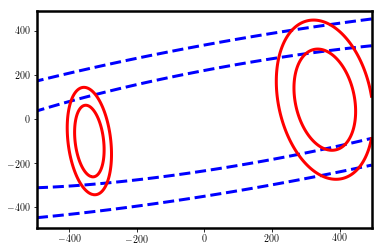

189.126724144 80.1957728232


In [128]:
nbins = 500
vv = linspace(vmin,vmax,nbins)
vfine = linspace(vmin,vmax,1000)
V1,V2 = meshgrid(vv,vv)

def fv_2D_bimodal(v1,v2):
    model = mixture.GaussianMixture(n_components=2, covariance_type='full')
    model.fit(array([v1,v2]).T)

    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    fv = fv-amax(fv)
    chi = -0.5*sum(model.score_samples(array([v1,v2]).T))/2.0
    return fv,chi

def fv_2D_unimodal(v1,v2):
    model = mixture.GaussianMixture(n_components=1, covariance_type='full')
    model.fit(array([v1,v2]).T)

    VV = array([V1.ravel(), V2.ravel()]).T
    fv = model.score_samples(VV)
    fv = fv.reshape(V1.shape)
    fv = fv-amax(fv)
    chi = -0.5*sum(model.score_samples(array([v1,v2]).T))/1.0
    return fv,chi

fv1,chi1 = fv_2D_unimodal(vx,vz)
fv2,chi2 = fv_2D_bimodal(vx,vz)
plt.contour(vv,vv,fv1,levels=[-9,-4],linewidths=3,colors='Blue',linestyles='solid')
plt.contour(vv,vv,fv2,levels=[-9,-4],linewidths=3,colors='red',linestyles='solid')
plt.show()

print chi1,chi2

In [125]:
amax(fv1)

3.6427863442657804

In [ ]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)

nbins = 100

betamin = -1.0
betamax = 1.0
fehmin = -3.0
fehmax = 0.0

colsubs = flipud(cm.Spectral(linspace(0.0,1.0,num_cands)))

mrkz = ['o','s','d','*','d','^','v','<','>','8','p','h','X','D',]
nm = size(mrkz)

fehs = zeros(shape=num_cands)
betas = zeros(shape=num_cands)
fehs_err = zeros(shape=num_cands)
betas_err = zeros(shape=num_cands)
for i in range(0,num_cands):
    Cand = df.loc[df['group_id'] == names[i]]
    vr,vphi,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel
    sigr,sigphi,sigz = std(vr),std(vphi),std(vz)
    beta_stars = 1.0-(vphi**2.0+vz**2.0)/(2*vr**2.0)
    sigr = std(Cand.GalRVel)
    sigphi = std(Cand.GalTVel)
    sigz = std(Cand.GalzVel)
    fehs[i] = mean(Cand.feh)
    fehs_err[i] = std(Cand.feh)
    betas[i] = 1-(sigphi**2.0+sigz**2.0)/(2*sigr**2.0)
    betas_err[i] = std(beta_stars)
    plt.errorbar(fehs[i],betas[i],xerr=fehs_err[i],markersize=15,color=colsubs[i,:],
                 marker=mrkz[mod(i,nm)],linewidth=3,markeredgecolor='k',label=names[i])
    
feh_vals = linspace(fehmin,fehmax,nbins)
beta_vals = linspace(betamin,betamax,nbins)
Feh_vals,Beta_vals = meshgrid(feh_vals,beta_vals)
feh_saus = -1.4
sig_feh_saus = 0.3
beta_saus = 0.9
sig_beta_saus = 0.1             
Saus = exp(-(Feh_vals-feh_saus)**2.0/(2*sig_feh_saus**2.0)-(Beta_vals-beta_saus)**2.0/(2*sig_beta_saus**2.0))
plt.contourf(feh_vals,beta_vals,Saus,'-',levels=[0.2,0.5,1.0],linewidths=3,cmap=cm.Reds,alpha=0.5)
plt.contour(feh_vals,beta_vals,Saus,'-',levels=[0.2,0.5,1.0],linewidths=3,colors='Crimson')
leg = plt.legend(loc='lower right',fontsize=15,ncol=2)

ax.grid()
ax.set_xlim(left=fehmin,right=fehmax)
ax.set_ylim(bottom=betamin,top=betamax)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"[Fe/H] [dex]",fontsize=45);
plt.ylabel(r"$\beta$",fontsize=45);

plt.show()

In [ ]:
colsubs = flipud(cm.Spectral(linspace(0.0,1.0,num_cands)))
BulgeColour = 'Crimson'
DiskColour = 'Blue'
cmap = cm.Greens
xmin = 0.0
xmax = 16.0
Grid = False
z_th = 6.0
n_refinements = 1
alpha_in = 1.0
alpha_out = 0.1
Footprint = True



# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(1, 2,figsize=(16,7))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.23)
ax_xy = plt.subplot(gs[0])
ax_xz = plt.subplot(gs[1])

# Bulge and disk
xvals = linspace(0.0,xmax,100)
zvals = linspace(-xmax/2.0,xmax/2.0,100)
xx,zz = meshgrid(xvals,zvals)
R = sqrt(xx**2.0+zz**2.0)
rp = sqrt(R**2.0+(zz/0.5)**2.0)
rho_bulge = 95.6/((1.0+(rp/0.075))**1.8)*exp(-(rp/2.1)**2.0)
rho_bulge_xy = 95.6/((1.0+(R/0.075))**1.8)*exp(-(R/2.1)**2.0)

rho_thind = 816.6/(2*0.3)*exp(-abs(zz)/0.3 - R/2.6)
rho_thickd = 209.5/(2*0.9)*exp(-abs(zz)/0.9 - R/3.6)
rhomin = 0.5
ax_xz.contourf(xvals,zvals,log10(rho_thind),levels=arange(rhomin,3.0,0.5),cmap=cm.Blues,alpha=0.5,zorder=-1)
ax_xz.contourf(xvals,zvals,log10(rho_thickd),levels=arange(rhomin,3.0,0.5),cmap=cm.GnBu,alpha=0.5,zorder=-1)
ax_xz.contourf(xvals,zvals,log10(rho_bulge),levels=arange(-2,3,0.5),cmap=cm.Reds,alpha=0.9,zorder=-1)
ax_xy.contourf(xvals,zvals,log10(rho_bulge_xy),levels=arange(-2,3,0.5),cmap=cm.Reds,alpha=0.9,zorder=-1)


for i in range(0,num_cands):
    name = names[i]
    Cand = df.loc[df['group_id'] == name]
    StarsColour = colsubs[i,:]

    name = Cand.group_id.unique()[0]
    nstars = size(Cand,0)
    x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ
    U,V,W = Cand.GalU,Cand.GalV,Cand.GalW

    # reduced points
    x_red,y_red,z_red,U_red,V_red,Z_red = 
        RemovePhaseSpaceOutliers(x,y,z,U,V,W,z_th=z_th)
        

    # Check if Sun in reduced hull
    Sun = array([8.122,0.0,0.005])
    SunOverlap = in_hull(Sun,transpose(array([x_red,y_red,z_red])))
    if SunOverlap:
        alpha = alpha_in
        edgecolor = 'k'
    else:
        alpha = alpha_out
        edgecolor = StarsColour
    
    # Convex hull reduced
    points = transpose(array([x_red,y_red]))
    hull = ConvexHull(points)
    x_edge = points[hull.vertices,0]
    y_edge = points[hull.vertices,1]
    hull_smooth = chaikins_corner_cutting(x_edge,y_edge,refinements=n_refinements)
    ax_xy.fill(hull_smooth[:,0],hull_smooth[:,1],alpha=alpha,facecolor=StarsColour,zorder=0,label=name,edgecolor=edgecolor)
    
    points = transpose(array([x_red,z_red]))
    hull = ConvexHull(points)
    x_edge = points[hull.vertices,0]
    z_edge = points[hull.vertices,1]
    hull_smooth = chaikins_corner_cutting(x_edge,z_edge,refinements=n_refinements)
    ax_xz.fill(hull_smooth[:,0],hull_smooth[:,1],alpha=alpha,facecolor=StarsColour,zorder=0,edgecolor=edgecolor)

    if SunOverlap:
        ax_xy.quiver(mean(x_red),mean(y_red),mean(U_red),mean(V_red),\
                    color=StarsColour,scale=400.0,linewidth=1.5,edgecolor='k',width=0.01,zorder=5)
        ax_xz.quiver(mean(x_red),mean(z_red),mean(U_red),mean(W_red),\
                    color=StarsColour,scale=400.0,linewidth=1.5,edgecolor='k',width=0.01,zorder=5)


# bulge 
r_bulge = 3.0
th = linspace(-pi,pi,100)
#ax_xy.fill(r_bulge*cos(th),r_bulge*sin(th),color=BulgeColour,alpha=0.3)
#ax_xz.fill(r_bulge*cos(th),r_bulge*sin(th),color=BulgeColour,alpha=0.3)

# disk
#z_thick = 1.5
#z_thin = 0.3
#ax_xz.fill_between([xmin,xmax],[z_thick,z_thick],y2=-z_thick,color=DiskColour,alpha=0.3)
#ax_xz.fill_between([xmin,xmax],[z_thin,z_thin],y2=-z_thin,color=DiskColour,alpha=0.3)

# The sun
ax_xy.plot(Sun[0]*cos(th),Sun[0]*sin(th),'--',linewidth=3,color='orangered')
ax_xy.plot(Sun[0],Sun[1],'*',markerfacecolor='yellow',markersize=32,markeredgecolor='red',markeredgewidth=2,zorder=5)
ax_xz.plot(Sun[0],Sun[2],'*',markerfacecolor='yellow',markersize=32,markeredgecolor='red',markeredgewidth=2,zorder=5)

x1 = Sun[0]*cos(-pi/4)
y1 = Sun[0]*sin(-pi/4)
x2 = Sun[0]*cos(-pi/4+0.1)
y2 = Sun[0]*sin(-pi/4+0.1)
ax_xy.arrow(x1,y1,x2-x1,y2-y1,color='orangered',lw=3,length_includes_head=True,head_width=0.5)

x1 = Sun[0]*cos(pi/4)
y1 = Sun[0]*sin(pi/4)
x2 = Sun[0]*cos(pi/4+0.1)
y2 = Sun[0]*sin(pi/4+0.1)
ax_xy.arrow(x1,y1,x2-x1,y2-y1,color='orangered',lw=3,length_includes_head=True,head_width=0.5)


# legend
leg = ax_xy.legend(loc='upper left',ncol=5,fontsize=9)


# xy labels
ax_xy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=15)
ax_xy.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax_xy.set_xlabel(r"Galactic $X$ [kpc]",fontsize=27);
ax_xy.set_ylabel(r"Galactic $Y$ [kpc]",fontsize=27);

# xz labels
ax_xz.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=15)
ax_xz.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax_xz.set_xlabel(r"Galactic $X$ [kpc]",fontsize=27);
ax_xz.set_ylabel(r"Galactic $Z$ [kpc]",fontsize=27);

if Grid:
    phi = linspace(-pi/2,pi/2,7)
    xvals = linspace(xmin,xmax,100)
    rvals = arange(xmin,xmax*1.5,2.0)
    nr = size(rvals)
    zvals = arange(-xmax,xmax,2.0)
    nz = size(zvals)
    for ii in range(0,7):
        ax_xy.plot(xvals,xvals*tan(phi[ii]),'-',color='gray',lw=0.5)
    for ii in range(0,nr):
        ax_xy.plot(rvals[ii]*cos(th),rvals[ii]*sin(th),'-',color='gray',lw=0.5)
        ax_xz.plot(rvals[ii]*cos(th),rvals[ii]*sin(th),'-',color='gray',lw=0.5)
    for ii in range(0,nz):
        ax_xz.plot([xmin,xmax],[zvals[ii],zvals[ii]],'-',color='gray',lw=0.5)
    ax_xy.set_yticks(arange(-xmax,xmax,2.0))
    ax_xz.set_yticks(arange(-xmax,xmax,2.0))

ax_xy.set_xlim([xmin,xmax])
ax_xy.set_ylim([-xmax/2.0,xmax/2.0])
ax_xz.set_xlim([xmin,xmax])
ax_xz.set_ylim([-xmax/2.0,xmax/2.0])

if Footprint:
    footprint_XY = loadtxt('../GAIA-SDSS_footprint_XY.txt')
    ax_xy.plot(footprint_XY[:,0],footprint_XY[:,1],'-',color='gray',lw=1.0)
    footprint_XZ = loadtxt('../GAIA-SDSS_footprint_XZ.txt')
    ax_xz.plot(footprint_XZ[:,0],footprint_XZ[:,1],'-',color='gray',lw=1.0)


plt.show()

In [ ]:
ZSCORE<z_th

In [ ]:
S1 = pandas.read_csv('../S1_only_cat_simple.csv')
x = S1.GalRecX
y = S1.GalRecY
vx = S1.GalU
vy = S1.GalV

r = S1.GalR
phi = S1.Galphi
vr = S1.GalRVel
vphi = S1.GalphiVel

plt.quiver(x,y,vx,vy)
plt.quiver(r*cos(phi),r*sin(phi),cos(phi)*vr-sin(phi)*vphi,sin(phi)*vr+cos(phi)*vphi)
plt.show()

In [ ]:
for i in range(0,num_cands):
    Cand = df.loc[df['group_id'] == names[i]]
    Vtot = sqrt(Cand.U**2.0+Cand.V**2.0 +Cand.W**2.0)
    plt.hist(Vtot,color=colsubs[i,:],bins=10)
    
plt.show()

In [ ]:
arr = transpose(array([x_red,y_red,z_red]))
arr

In [ ]:
fig = plt.subplots(1, 1,figsize=(7,7))
xvals = linspace(0.0,xmax,100)
zvals = linspace(-xmax/2.0,xmax/2.0,100)
xx,zz = meshgrid(xvals,zvals)
R = sqrt(xx**2.0+zz**2.0)
rp = sqrt(R**2.0+(zz/0.5)**2.0)
rho_bulge = 95.6/((1.0+(rp/0.075))**1.8)*exp(-(rp/2.1)**2.0)
rho_thind = 816.6/(2*0.3)*exp(-abs(zz)/0.3 - R/2.6)
rho_thickd = 209.5/(2*0.9)*exp(-abs(zz)/0.9 - R/3.6)

rhomin = -1.0
plt.contourf(xvals,zvals,log10(rho_thind),levels=arange(rhomin,3,0.5),cmap=cm.Blues,alpha=0.3)
plt.contourf(xvals,zvals,log10(rho_thickd),levels=arange(rhomin,3,0.5),cmap=cm.GnBu,alpha=0.3)
plt.contourf(xvals,zvals,log10(rho_bulge),levels=arange(-3,3,0.5),cmap=cm.Reds,alpha=0.9)
plt.contour(xvals,zvals,log10(rho_bulge),levels=[-3.0],colors='Crimson',linestyle='-')


plt.show()

In [ ]:
footprint_XY = loadtxt('../GAIA-SDSS_footprint_XY.txt')
plt.plot(footprint_XY[:,0],footprint_XY[:,1],'k-')
plt.show()

In [ ]:
mod(14,13)